In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
!mkdir -p ~/ .kaggle

In [20]:
!cp -r kaggle.json ~/.kaggle/

In [21]:
!chmod 600 ~/ /root/.kaggle/kaggle.json

In [22]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:10<00:00, 195MB/s]
100% 1.06G/1.06G [00:11<00:00, 104MB/s]


In [23]:
!pip install keras==2.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 2.13.1 which is incompatible.


In [26]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [27]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [28]:
# internally it is using genrator concept which is there in python

train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/train/",
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"

)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/dogs_vs_cats/test/",
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode="int"


)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [29]:

for i in train_ds:
    print(i)

Streaming output truncated to the last 5000 lines.
         [196.69336   , 198.69336   , 177.69336   ]],

        [[ 37.564453  ,  59.564453  ,  83.        ],
         [ 37.564453  ,  59.564453  ,  82.96257   ],
         [ 37.564453  ,  59.564453  ,  82.792435  ],
         ...,
         [198.82227   , 200.82227   , 179.82227   ],
         [198.82227   , 200.82227   , 179.82227   ],
         [198.82227   , 200.82227   , 179.82227   ]],

        ...,

        [[ 14.048828  ,  16.048828  ,   0.        ],
         [ 13.98085   ,  15.98085   ,   0.        ],
         [ 13.67186   ,  15.67186   ,   0.        ],
         ...,
         [177.        , 178.        , 144.        ],
         [177.        , 178.        , 144.        ],
         [177.        , 178.        , 144.        ]],

        [[ 17.029297  ,  19.029297  ,   0.        ],
         [ 16.558823  ,  18.558823  ,   0.        ],
         [ 14.420303  ,  16.420303  ,   0.        ],
         ...,
         [177.        , 178.        , 1

In [30]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [31]:
model=Sequential()


In [32]:
# this is my first convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(128,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(64,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [34]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [35]:
model.fit(train_ds,epochs=2,validation_data=validation_ds)


Epoch 1/2
625/625 [==============================] - 80s 107ms/step - loss: 0.6398 - accuracy: 0.6274 - val_loss: 0.5036 - val_accuracy: 0.7626
Epoch 2/2
625/625 [==============================] - 55s 88ms/step - loss: 0.4864 - accuracy: 0.7624 - val_loss: 0.4529 - val_accuracy: 0.7852


In [54]:
model.save("/content/dog_cat.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
import matplotlib.pyplot as plt


In [39]:
dog_image=plt.imread("/content/dog_img.jpg")


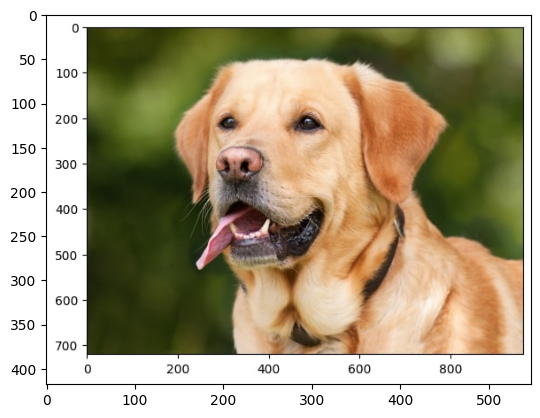

In [40]:
plt.imshow(dog_image)

In [41]:
cat_image=plt.imread("/content/cat_img.jpg")


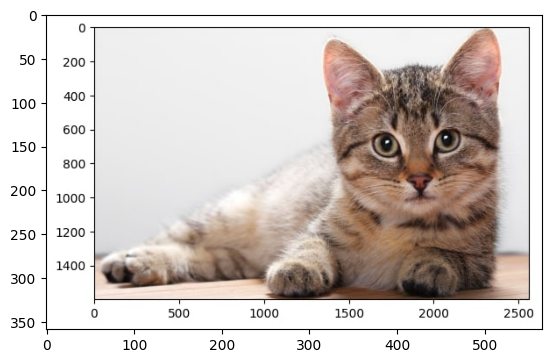

In [42]:
plt.imshow(cat_image)

In [43]:
dog_image.shape


(418, 548, 3)

In [44]:
cat_image.shape


(359, 566, 3)

In [45]:
import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [46]:
dog_resize.shape


(256, 256, 3)

In [47]:
cat_resize.shape


(256, 256, 3)

In [48]:
dog_resize=dog_resize.reshape((1,256,256,3))


In [49]:
dog_resize.shape


(1, 256, 256, 3)

In [50]:
cat_resize=cat_resize.reshape((1,256,256,3))


In [51]:
pred=model.predict(dog_resize)


1/1 [==============================] - 0s 247ms/step


In [52]:
model.predict(cat_resize)


1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

In [55]:
if pred==0:
    print("this is a image of cat")
else:
    print("this is a image of dog")

this is a image of dog


In [59]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [75]:
myimg = image.load_img(r"/content/cat_img.jpg",target_size=(250,250))

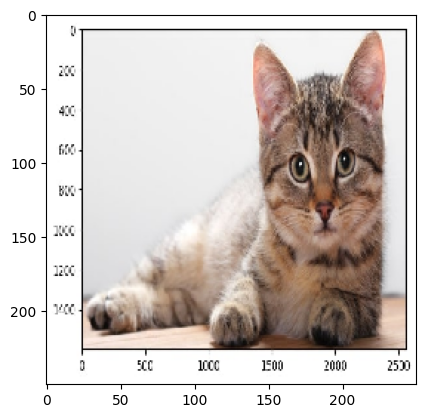

In [76]:
plt.imshow(myimg)

In [77]:
type(myimg)

PIL.Image.Image

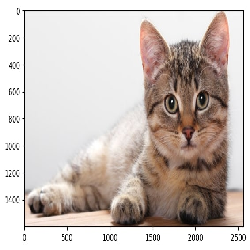

In [78]:
myimg

In [79]:
img = image.img_to_array(myimg)

In [80]:
type(img)

numpy.ndarray

In [81]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    shear_range = 0.3,
    zoom_range= 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    width_shift_range = 0.3,
    height_shift_range = 0.2
)

In [82]:
img.shape

(250, 250, 3)

In [83]:
imput_image = img.reshape(1,250,250,3)

In [84]:
imput_image.shape

(1, 250, 250, 3)

In [87]:
i=0
for output in datagen.flow(imput_image,save_to_dir = "/content/augmented_image"):
  i=i+1

  if i==10:
    break

In [88]:
train_datagen = ImageDataGenerator(
    shear_range = 0.3,
    zoom_range= 0.2,
    horizontal_flip = True,
    rescale=1.255
)

In [89]:
train_genrator = train_datagen.flow_from_directory(
   "/content/dogs_vs_cats/train/",
   target_size = (150,150),
   batch_size= 15,
   class_mode = "binary"
)

Found 20000 images belonging to 2 classes.


In [90]:
test_datagen = ImageDataGenerator(
    rescale=1.255
)

In [91]:
test_genrator = test_datagen.flow_from_directory(
   "/content/dogs_vs_cats/test/",
   target_size = (150,150),
   batch_size= 15,
   class_mode = "binary"
)

Found 5000 images belonging to 2 classes.


In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [113]:
model=Sequential()


In [114]:
# this is my first convolution layer
model.add(Conv2D(24,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#second convolution
model.add(Conv2D(36,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#third convlolution
model.add(Conv2D(48,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#convert the data into 1-d array
model.add(Flatten())

#adding first hidden layer with 128 neurons and realu activation
model.add(Dense(64,activation='relu'))
#adding second hidden layer with 64 neurons and relu activation
model.add(Dense(32,activation='relu'))
#here we have a 1 output since it is a binary classification
model.add(Dense(1,activation='sigmoid'))

In [115]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 148, 148, 24)      672       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 74, 74, 24)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 72, 72, 36)        7812      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 36, 36, 36)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 34, 34, 48)        15600     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 17, 17, 48)       

In [116]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [117]:
model.fit_generator(train_genrator,epochs=2,validation_data=test_genrator)


Epoch 1/2


<ipython-input-117-71e3b499e9c8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_genrator,epochs=2,validation_data=test_genrator)


1334/1334 [==============================] - 150s 111ms/step - loss: 0.8551 - accuracy: 0.5892 - val_loss: 0.6747 - val_accuracy: 0.5780
Epoch 2/2
1334/1334 [==============================] - 148s 111ms/step - loss: 0.6221 - accuracy: 0.6543 - val_loss: 0.5948 - val_accuracy: 0.6830
